# Examining Results From Scraping the Star Trek Wiki

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


## How many of the Star Trek planets are habitable?

In [9]:
df = pd.read_csv('scraped_planets.csv')
df.head()

,planet_name,status
0,Aaamazzara,Habitable
1,Acamar_III,Habitable
2,Achrady_VII,Habitable
3,Adarak_Prime,Habitable
4,Adelphous_IV,Intact


In [23]:
# Clean statuses
df['status'] = df['status'].replace("Habitability", "Habitable")
df['status'] = df['status'].replace("Habitable;", "Habitable")
df['status'] = df['status'].replace("Inhabited", "Habitable")
df['status'] = df['status'].replace("Destroyed;", "Destroyed")
df['status'] = df['status'].replace("Devastated", "Destroyed")
df['status'] = df['status'].replace("Devasted", "Destroyed")
df['status'] = df['status'].replace("Barely", "Habitable")
df['status'] = df['status'].replace("Depopulated", "Abandoned")
df['status'] = df['status'].replace("Geologically", "Uninhabitable")
df['status'] = df['status'].replace("Active", "Uninhabitable")
df['status'] = df['status'].replace("Extinguished", "Uninhabitable")
df['status'] = df['status'].replace("In", "In another dimension")
df['status'] = df['status'].replace("Undergoing", "Undergoing terraformation")

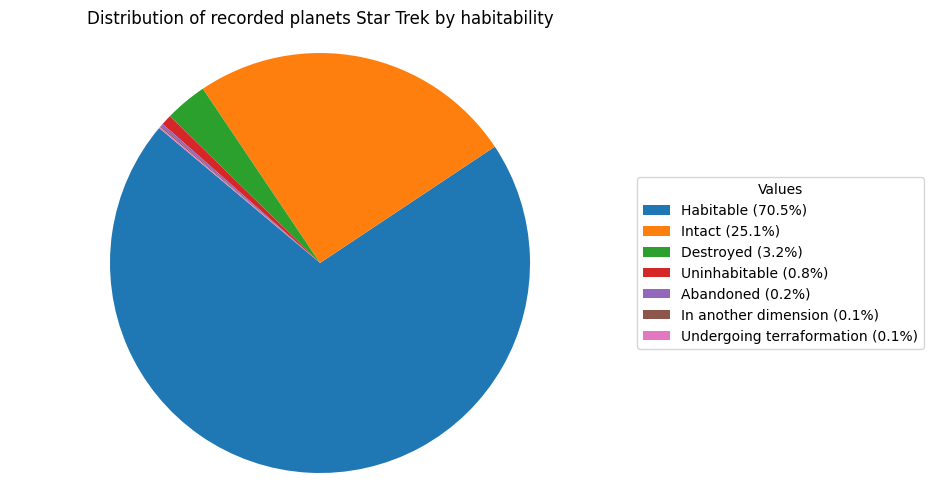

In [32]:
value_counts = df['status'].value_counts()

plt.figure(figsize=(8, 6))
patches, _= plt.pie(value_counts, labels=None, startangle=140)
plt.title('Distribution of recorded planets Star Trek by habitability')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create legend labels with percentages
legend_labels = [f'{val} ({count / value_counts.sum() * 100:.1f}%)' for val, count in value_counts.items()]

# Add legend with labels and percentages
plt.legend(patches, legend_labels, title='Values', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## What is the breakdown of Star Fleet officers by rank?

In [33]:
df = pd.read_csv('scraped_ranks.csv')
df.head()

,officer_name,rank
0,Alex,Crewman
1,Alison,Crewman
2,Almack,Ensign
3,Masaro,Ensign
4,Jonathan Archer,Admiral


In [44]:
# Clean ranks

df['rank'] = df['rank'].replace("Crewman first class", "Crewman")
df['rank'] = df['rank'].replace("Crewman second class", "Crewman")
df['rank'] = df['rank'].replace("Crewman third class", "Crewman")
df['rank'] = df['rank'].replace("Vice admiral", "Vice Admiral")

In [45]:
value_counts = df['rank'].value_counts()
value_counts

rank
Ensign                  23
Crewman                 21
Captain                 10
Commander                7
Lieutenant               5
Admiral                  2
Vice Admiral             1
Fleet Admiral            1
Rear Admiral             1
Lieutenant Commander     1
Name: count, dtype: int64

In [46]:
order = ['Crewman', 'Ensign', 'Lieutenant', "Lieutenant Commander", "Commander", "Captain", "Rear Admiral", "Vice Admiral", "Admiral", "Fleet Admiral"]

value_counts = value_counts.reindex(order)
value_counts

rank
Crewman                 21
Ensign                  23
Lieutenant               5
Lieutenant Commander     1
Commander                7
Captain                 10
Rear Admiral             1
Vice Admiral             1
Admiral                  2
Fleet Admiral            1
Name: count, dtype: int64

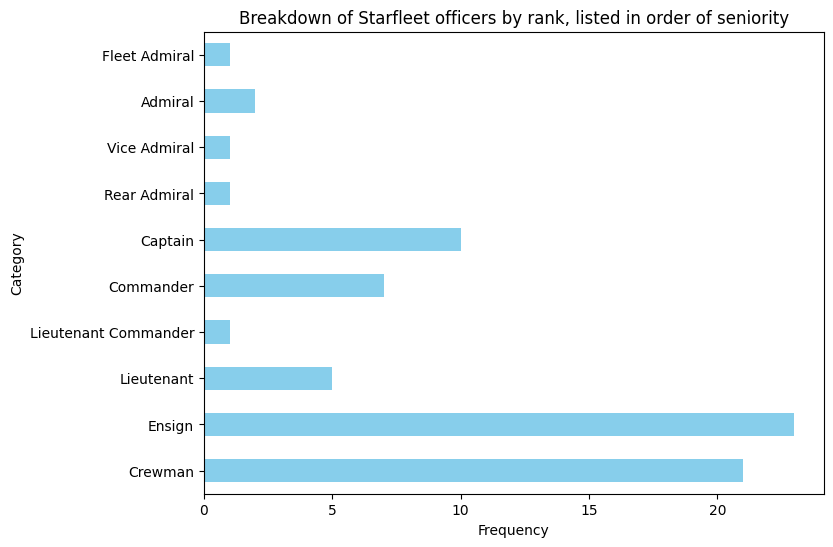

In [47]:
# Plot horizontal histogram

value_counts.plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title('Breakdown of Starfleet officers by rank, listed in order of seniority')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()